In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import rental_utils
from rental_utils import *; reload(rental_utils)

<module 'rental_utils' from 'rental_utils.pyc'>

In [2]:
train = pd.read_json('Data/train.json')

In [3]:
ny = gpd.read_file("Data/ZillowNeighborhoods-NY/ZillowNeighborhoods-NY.shp")
nyc = ny[ny['City']=='New York'][['County', 'Name', 'RegionID', 'geometry']]
nyc

,County,Name,RegionID,geometry
2,Queens,Rego Park,6719,POLYGON ((-73.85629999999999 40.72303000000012...
5,Queens,Belle Harbor,10329,POLYGON ((-73.85618223699993 40.56810940300005...
10,New York,Roosevelt Island,20239,POLYGON ((-73.96143117599991 40.74851331600007...
13,Queens,Howard Beach,21970,POLYGON ((-73.85608525799972 40.65037135900031...
16,Queens,Breezy Point,37557,POLYGON ((-73.90962826099991 40.56552556300005...
21,Queens,Neponsit,42662,POLYGON ((-73.85990620999991 40.56700771800007...
23,Queens,East Elmhurst,45032,POLYGON ((-73.86286955999992 40.76695847800005...
25,Bronx,West Farms,48417,POLYGON ((-73.87729106686085 40.84245433729515...
27,Queens,Cambria Heights,50348,POLYGON ((-73.73909357074226 40.70117794641342...
33,Queens,Fresh Meadows,4819,"POLYGON ((-73.7699123773972 40.74150740314482,..."


In [4]:
locations = add_region(train)
locations.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,listing_id,manager_id,photos,price,street_address,geometry,County,Name,RegionID
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",medium,7170325,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,POINT (-73.9539 40.7108),Kings,Williamsburg,199001
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",low,7092344,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,POINT (-73.9722 40.7513),New York,Turtle Bay,270953
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",medium,7158677,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,POINT (-73.96250000000001 40.7575),New York,Sutton Place,270946
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,7211212,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,POINT (-73.9425 40.7145),Kings,Williamsburg,199001
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",low,7225292,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,POINT (-73.9743 40.7439),New York,Gramercy,273860


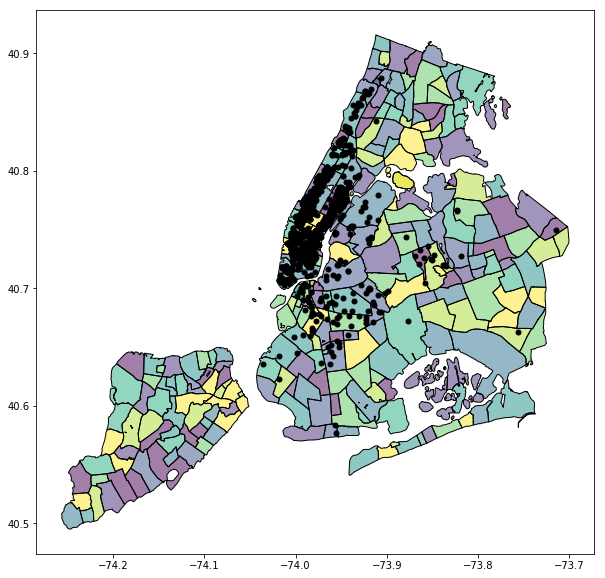

In [5]:
plot_locations = gpd.GeoDataFrame(locations.iloc[:1000])
plot_locations = plot_locations.loc[~pd.isnull(plot_locations['RegionID'].values)]

fig, ax = plt.subplots(1, figsize=(10,10))
nyc.plot(ax=ax)
plot_locations.plot(ax=ax, color="black", markersize=5)

In [6]:
locations.loc[pd.isnull(locations['RegionID'].values)]

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,listing_id,manager_id,photos,price,street_address,geometry,County,Name,RegionID
624,1.0,1,879ebf4d205aac05ba667291b5a3b183,2016-06-16 02:01:40,Spacious floor plans and sweeping waterfront v...,20 River Court,"[Dogs Allowed, Cats Allowed, No Fee]",low,7166766,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7166766_3968d9f8...,2660,20 River Court,POINT (-74.03189999999999 40.7274),None,NaN,NaN
872,1.0,2,de47025fe5e6d20a1360cb3efe8c8348,2016-06-11 06:44:25,"Spacious two bedroom, corner unit with...",32 Garrison Street,"[Elevator, Cats Allowed, Dogs Allowed]",low,7143730,c090563865adf7dd1c953e9d6bd65318,[https://photos.renthop.com/2/7143730_775991d2...,4186,32 Garrison Street,POINT (-71.07940000000001 42.3459),None,NaN,NaN
928,1.0,1,28970cf24998e1951655245ec9d124d9,2016-06-24 02:01:03,Spacious floor plans and sweeping waterfront v...,30 River Court,"[Dogs Allowed, Cats Allowed, No Fee]",low,7206346,e5808a5e6cc13988fe596704428d38d5,[],2715,30 River Court,POINT (-74.0311 40.7276),None,NaN,NaN
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",low,7087715,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,POINT (0 0),None,NaN,NaN
3032,1.0,1,6f1c6faae4f36f36eb0b58558e885370,2016-06-01 15:42:45,"Embankment Houses spacious studio, 1-, 2-, and...",270 Tenth Street,"[No Fee, Elevator, Fitness Center, Laundry in ...",medium,7094296,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7094296_92efa1a7...,2620,270 Tenth Street,POINT (-74.0311 40.7492),None,NaN,NaN
4719,2.0,2,51052daba3eae7ee4e27bf436f7eb5a9,2016-06-27 02:48:10,Super Spacious Renovated 2BR/2BATH with Home O...,84 Street,"[Private Outdoor Space, Dishwasher, Hardwood F...",low,7221153,5856ea690d343df5f3bc66315babb280,[https://photos.renthop.com/2/7221153_0160c1e4...,2300,1844 84 Street,POINT (-73.4662 42.8724),None,NaN,NaN
4757,1.0,1,6f1c6faae4f36f36eb0b58558e885370,2016-06-01 15:43:15,"Embankment Houses spacious studio, 1-, 2-, and...",270 Tenth Street,[No Fee],high,7094342,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7094342_8653e578...,2490,270 Tenth Street,POINT (-74.0311 40.7492),None,NaN,NaN
5307,2.0,3,6f1c6faae4f36f36eb0b58558e885370,2016-06-16 02:01:46,"Embankment Houses spacious studio, 1-, 2-, and...",270 Tenth Street,"[No Fee, Elevator, Fitness Center, Laundry in ...",low,7166771,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7166771_09f86b3f...,4121,270 Tenth Street,POINT (-74.0311 40.7492),None,NaN,NaN
5560,1.0,0,96122750f025499b86c3874e12144967,2016-06-12 13:42:48,,Memorial Highway,"[Cats Allowed, Dogs Allowed]",low,7152474,9556a2e6dd5f856dfaf77cd09fb8af38,[],1663,40 Memorial Highway,POINT (-73.7837 40.9094),None,NaN,NaN
6030,1.0,2,19e47f7af4182c57f640657ba54cb647,2016-06-12 12:01:20,,Bronx River Rd,[],low,7150483,13ba0401009462627cd7b3c5fc745e37,[],1850,185 Bronx River Rd,POINT (-73.85720000000001 40.9074),None,NaN,NaN
